In [1]:
# Importing data
prod <- read.csv('../ch1/data/productivityREG.csv', header=T)
t(prod)

quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,⋯,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2
department,sweing,finishing,sweing,sweing,sweing,sweing,finishing,sweing,sweing,sweing,⋯,finishing,sweing,sweing,sweing,sweing,finishing,finishing,finishing,finishing,finishing
day,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,⋯,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
team,8,1,11,12,6,7,2,3,2,1,⋯,5,10,9,1,4,10,8,7,9,6
target,0.80,0.75,0.80,0.80,0.80,0.80,0.75,0.75,0.75,0.75,⋯,0.70,0.75,0.75,0.75,0.75,0.75,0.70,0.65,0.75,0.70
smv,26.16,3.94,11.41,11.41,25.90,25.90,3.94,28.08,19.87,28.08,⋯,3.94,21.82,18.79,26.82,26.82,2.90,3.90,3.90,2.90,2.90
wip,1108,0,968,968,1170,984,0,795,733,681,⋯,0,1674,290,1322,1054,0,0,0,0,0
over_time,7080,960,3660,3660,1920,6720,960,6900,6000,6900,⋯,1440,6000,5040,7080,7080,960,960,960,1800,720
incentive,98,0,50,50,50,38,0,45,34,45,⋯,0,34,45,45,45,0,0,0,0,0
numworkers,59.0,8.0,30.5,30.5,56.0,56.0,8.0,57.5,55.0,57.5,⋯,12.0,50.0,52.0,59.0,59.0,8.0,8.0,8.0,15.0,6.0
productivity,0.9407254,0.8865000,0.8005705,0.8005705,0.8003819,0.8001250,0.7551667,0.7536835,0.7530975,0.7504278,⋯,0.7588500,0.7506080,0.7503473,0.7500508,0.7500508,0.6283333,0.6256250,0.6256250,0.5058889,0.3947222


In [2]:
# Factorizing predicator variables
prod$quarter <- factor(prod$quarter)
prod$department <- factor(prod$department)
prod$day <- factor(prod$day)
prod$team <- factor(prod$team)

In [3]:
### Regression Tree
library(rpart)
set.seed(1234)
my.control <- rpart.control(xval=10, cp=0.01, minsplit=30)

In [4]:
tree.prod <- rpart(productivity ~ ., data=prod, method='anova', control=my.control)

In [5]:
tree.prod

n= 936 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 936 19.0783800 0.7745872  
    2) target< 0.725 256  5.9939720 0.6987081  
      4) over_time>=3210 147  1.9551960 0.6661212  
        8) incentive< 28 59  1.1297170 0.5911298 *
        9) incentive>=28 88  0.2712242 0.7163995 *
      5) over_time< 3210 109  3.6721560 0.7426556  
       10) numworkers< 9.5 72  2.3460690 0.6953575  
         20) team=2,6,7,9,10,11 28  0.8858318 0.5938276 *
         21) team=1,4,5,8,12 44  0.9879286 0.7599675 *
       11) numworkers>=9.5 37  0.8515788 0.8346949  
         22) team=8,9,11 10  0.2922560 0.6892305 *
         23) team=1,2,4,5,6,7,10 27  0.2693539 0.8885707 *
    3) target>=0.725 680 11.0555500 0.8031535  
      6) incentive< 84.5 626  9.5634660 0.7899670  
       12) smv< 3.4 74  1.4816030 0.6786105  
         24) numworkers< 8.5 61  0.9512037 0.6481869 *
         25) numworkers>=8.5 13  0.2090045 0.8213672 *
       13) smv>=3.4 552  7.0412290 0.8048952  
     

In [7]:
# Display tree
library(rpart.plot)

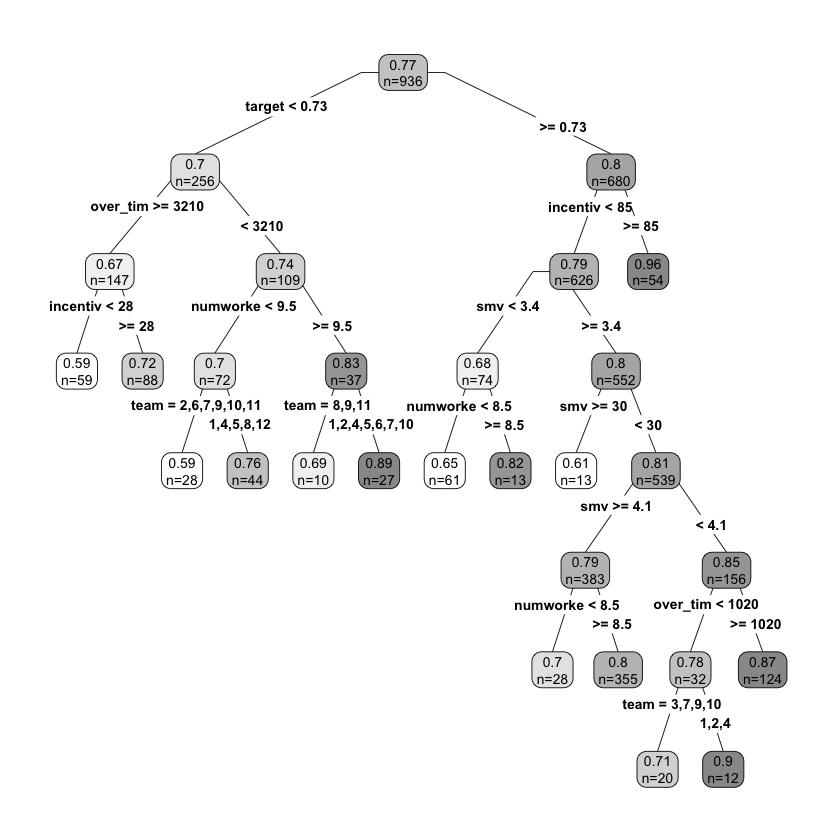

In [8]:
prp(tree.prod, type=4, extra=1, digits=2, box.palette='Grays')

In [10]:
# Pruning with c-s.e.
cps <- printcp(tree.prod)


Regression tree:
rpart(formula = productivity ~ ., data = prod, method = "anova", 
    control = my.control)

Variables actually used in tree construction:
[1] incentive  numworkers over_time  smv        target     team      

Root node error: 19.078/936 = 0.020383

n= 936 

         CP nsplit rel error  xerror     xstd
1  0.106343      0   1.00000 1.00131 0.051171
2  0.071847      1   0.89366 0.91542 0.049271
3  0.054545      2   0.82181 0.85369 0.048553
4  0.027157      3   0.76726 0.78994 0.047001
5  0.024380      4   0.74011 0.79369 0.049856
6  0.021192      8   0.64221 0.76571 0.049399
7  0.016846      9   0.62102 0.74842 0.049034
8  0.015199     10   0.60417 0.74757 0.049209
9  0.013344     11   0.58897 0.74632 0.049216
10 0.012132     12   0.57563 0.73686 0.048710
11 0.010000     14   0.55137 0.71037 0.046591


In [11]:
# Pruning with c-s.e.
k <- which.min(cps[, 'xerror'])
k

11 
11

In [12]:
err <- cps[k, 'xerror'];
err

[1] 0.7103661

In [13]:
se <- cps[k, 'xstd']
se

[1] 0.04659078

In [14]:
c <- 1 # 1-s.e.

In [15]:
k1 <- which(cps[,'xerror'] <= err + c * se)[1]
k1

7 
7

In [16]:
cp.chosen <- cps[k1, 'CP']
cp.chosen

[1] 0.01684601

In [17]:
tree.pruned.prod <- prune(tree.prod, cp=cp.chosen)

In [18]:
tree.pruned.prod

n= 936 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 936 19.0783800 0.7745872  
   2) target< 0.725 256  5.9939720 0.6987081  
     4) over_time>=3210 147  1.9551960 0.6661212  
       8) incentive< 28 59  1.1297170 0.5911298 *
       9) incentive>=28 88  0.2712242 0.7163995 *
     5) over_time< 3210 109  3.6721560 0.7426556  
      10) numworkers< 9.5 72  2.3460690 0.6953575  
        20) team=2,6,7,9,10,11 28  0.8858318 0.5938276 *
        21) team=1,4,5,8,12 44  0.9879286 0.7599675 *
      11) numworkers>=9.5 37  0.8515788 0.8346949 *
   3) target>=0.725 680 11.0555500 0.8031535  
     6) incentive< 84.5 626  9.5634660 0.7899670  
      12) smv< 3.4 74  1.4816030 0.6786105 *
      13) smv>=3.4 552  7.0412290 0.8048952  
        26) smv>=30.25 13  0.2204477 0.6076220 *
        27) smv< 30.25 539  6.3026620 0.8096532  
          54) smv>=4.115 383  3.3506460 0.7921739 *
          55) smv< 4.115 156  2.5477100 0.8525670 *
     7) incentive>=84.5 54  0.121352

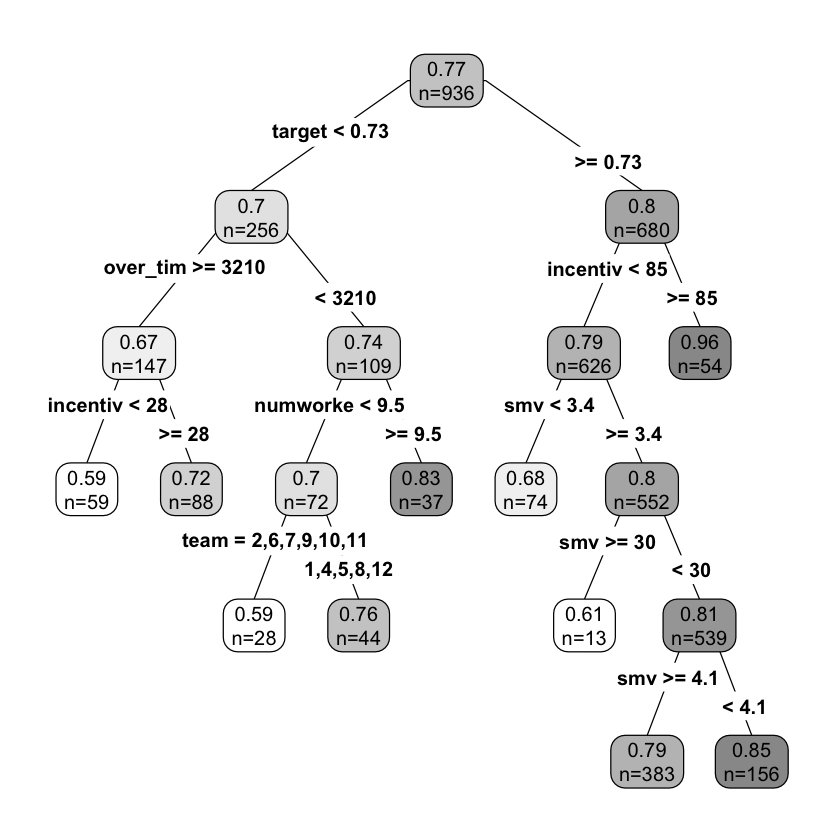

In [19]:
prp(tree.pruned.prod, type=4, extra=1, digits=2, box.palette='Grays')

In [21]:
# Making predictions
pred.tree.prod <- predict(tree.pruned.prod, newdata=prod, type='vector')
t(pred.tree.prod)

1,2,3,4,5,6,7,8,9,10,⋯,927,928,929,930,931,932,933,934,935,936
0.9560197,0.852567,0.7921739,0.7921739,0.7921739,0.7921739,0.852567,0.7921739,0.7921739,0.7921739,⋯,0.8346949,0.7921739,0.7921739,0.7921739,0.7921739,0.6786105,0.7599675,0.5938276,0.6786105,0.5938276


In [23]:
# Evaluation
mean((prod$productivity - pred.tree.prod)^2) # MSE
mean(abs(prod$productivity - pred.tree.prod)) # MAE

[1] 0.01265816

[1] 0.07839877

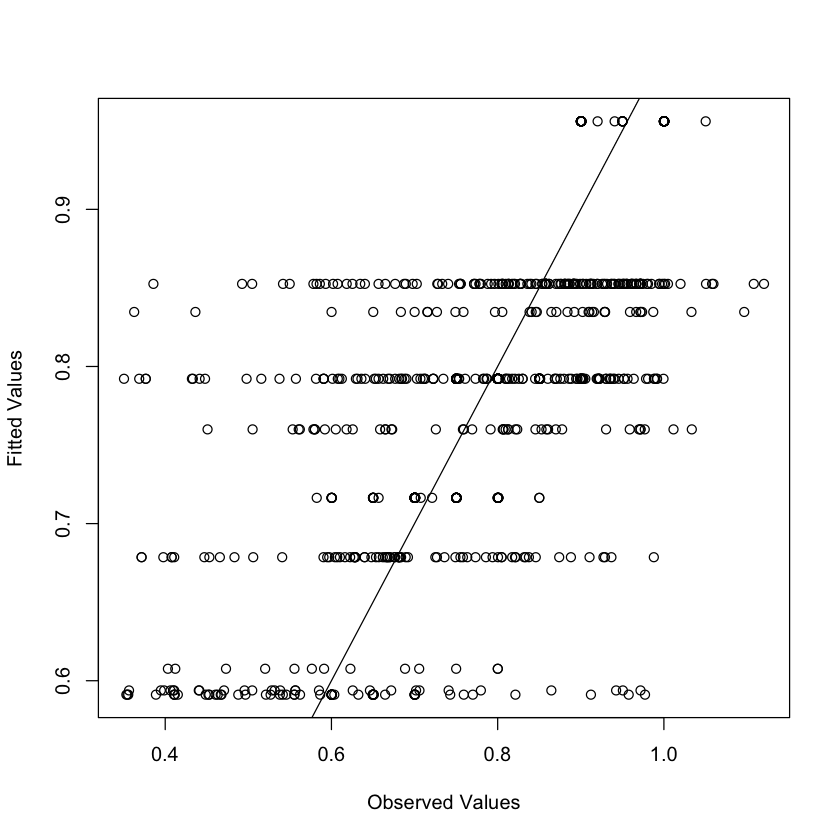

In [24]:
# Observed vs. Predicted
plot(prod$productivity, pred.tree.prod, xlab='Observed Values', ylab='Fitted Values')
abline(0, 1)